In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from heapq import nlargest
import string
from nltk.corpus import stopwords
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load data
path_to_data = '/content/drive/My Drive/Colab Notebooks/INFO 498 BTS and Kpop/lyrics-v5.csv'
lyrics_data = pd.read_csv(path_to_data)
lyrics_data.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False
4,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False


In [4]:
# data cleaning
lyrics_data = lyrics_data[~lyrics_data['lyrics'].isna()]

lyrics = lyrics_data['lyrics']

In [5]:
# convert list into str
for idx in lyrics.index:
  if type(lyrics[idx]) == list:
    lyrics[idx] = str(lyrics[idx]).translate(str.maketrans('', '', string.punctuation))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


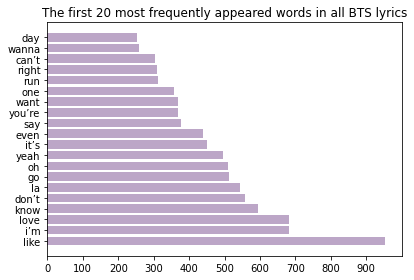

In [6]:
# the first 20 most frequently appeared words in all lyrics
word_count = {}
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
for song in lyrics:
  # remove punctuation in lyrics
  song = song.translate(str.maketrans('', '', string.punctuation))
  words = song.split()
  for word in words:
    if word.lower() not in sw_nltk:
      if word in word_count:
        word_count[word] += 1
      else:
        word_count[word] = 1
  # sort and then get first 20
  most20_appeared = dict(nlargest(20, word_count.items(), key=lambda i: i[1]))

# make a bar chart
y_pos = np.arange(len(most20_appeared.keys()))
plt.barh(y_pos, most20_appeared.values(), color='#BCA6C7')
plt.yticks(y_pos, most20_appeared.keys())
plt.xticks(np.arange(0, max(most20_appeared.values()), 100))
plt.title('The first 20 most frequently appeared words in all BTS lyrics')
plt.tight_layout()
#plt.savefig('./img/First_20_words.png')

In [7]:
# load mood data
path_to_mood_data = '/content/drive/My Drive/Colab Notebooks/INFO 498 BTS and Kpop/song_mood.csv'
mood_data = pd.read_csv(path_to_mood_data)
mood_data.head()

,id,eng_track_title,mood/0,mood/1,mood/2,mood/3,mood/4,mood/5
0,0,Intro: 2 Cool 4 Skool (ft. DJ Friz),Energetic,Powerful,NaN,NaN,NaN,NaN
1,1,We Are Bulletproof Pt.2,Energetic,Powerful,NaN,NaN,NaN,NaN
2,2,Skit: Circle Room Talk,Inspiring,NaN,NaN,NaN,NaN,NaN
3,3,No More Dream,Powerful,Angry,NaN,NaN,NaN,NaN
4,4,Interlude,Powerful,NaN,NaN,NaN,NaN,NaN


In [8]:
# combine all mood labels
mood_data['all_mood'] = mood_data['mood/0'].fillna('') + " " + mood_data['mood/1'].fillna('') + " "  + mood_data['mood/2'].fillna('') + " "  + mood_data['mood/3'].fillna('') + " "  + mood_data['mood/4'].fillna('') + " "  + mood_data['mood/5'].fillna('')

In [9]:
mood_data_new = mood_data[['eng_track_title', 'all_mood']]
mood_data_new.sample(10)

,eng_track_title,all_mood
81,Awake,Healing Sad Inspiring
51,Boyz With Fun,Energetic Happy
129,IDOL,Powerful Angry Energetic
38,Cypher Pt. 3: Killer (Ft._Supreme_Boi),Energetic Powerful Angry
169,Dynamite,Energetic Happy Healing
140,IDOL (Remix) ft. Nicki Minaj,Powerful Angry Energetic
182,Fly To My Room,Healing Inspiring Chill
2,Skit: Circle Room Talk,Inspiring
190,Butter (Hotter Remix),Energetic Happy Healing
18,OUTRO: LUV IN SKOOL,Falling In Love Healing


In [10]:
energectic_count = len(mood_data_new[mood_data_new['all_mood'].str.contains('Energetic')])
powerful_count = len(mood_data_new[mood_data_new['all_mood'].str.contains('Powerful')])
angry_count = len(mood_data_new[mood_data_new['all_mood'].str.contains('Angry')])
inspiring_count = len(mood_data_new[mood_data_new['all_mood'].str.contains('Inspiring')])
healing_count = len(mood_data_new[mood_data_new['all_mood'].str.contains('Healing')])
happy_count = len(mood_data_new[mood_data_new['all_mood'].str.contains('Happy')])
sad_count = len(mood_data_new[mood_data_new['all_mood'].str.contains('Sad')])
love_count = len(mood_data_new[mood_data_new['all_mood'].str.contains('Falling In Love')])

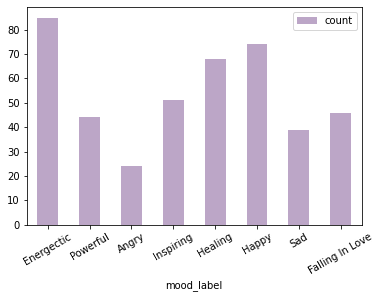

In [11]:
df = pd.DataFrame({'mood_label':['Energectic', 'Powerful', 'Angry', 'Inspiring', 'Healing', 'Happy', 'Sad', 'Falling In Love'], 
                   'count':[energectic_count, powerful_count, angry_count, inspiring_count, healing_count, happy_count, sad_count, love_count]})
ax = df.plot.bar(x='mood_label', y='count', rot=30, color='#BCA6C7')